In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter
def load_data(path = 'pd_speech_features.csv'):
    df = pd.read_csv(path).drop('id', axis=1)
    display(df)
    print(df.info(), Counter(df['class']))

    X = df.drop('class', axis=1)
    y = df['class']

    return X, y

In [ ]:
def normilize_data(X):
    # scale data
    from sklearn.preprocessing import MinMaxScaler
    X = MinMaxScaler().fit_transform(X)

    return X

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Oversampling
def oversample(in_data, target, sampling_strategy='minority'):
    oversample = RandomOverSampler(sampling_strategy= sampling_strategy)
    in_data_over, target_over = oversample.fit_resample(in_data, target)
    return in_data_over, target_over

In [ ]:
# Undersampling
def undersample(in_data, target, sampling_strategy= 'majority'):
    undersample = RandomUnderSampler(sampling_strategy= sampling_strategy)
    in_data_under, target_under = undersample.fit_resample(in_data, target)
    return in_data_under, target_under

In [ ]:
# SMOTE
def smote(in_data, target, sampling_strategy= 'minority'):
    smote = SMOTE(sampling_strategy= sampling_strategy)
    in_data_smote, target_smote = smote.fit_resample(in_data, target)
    return in_data_smote, target_smote

In [ ]:
# Function to Handle The Method
def handle_imbalanced(in_data, target, method, sampling_strategy= 'minority'):
    if method == 'oversample':
        return oversample(in_data, target)
    elif method == 'undersample':
        return undersample(in_data, target)
    elif method == 'smote':
        return smote(in_data, target)
    else:
        return in_data, target

In [ ]:
X, y = load_data()
balanced_data, balanced_target = handle_imbalanced(X, y, 'smote')
Counter(balanced_target)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB
None Counter({1: 564, 0: 192})


Counter({1: 564, 0: 564})

In [ ]:
# Dimentionality Reduction Techniqes
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# PCA Function
def pca_func(in_data, n_components, whitening = False, svd_solver = 'full', plot = True):
    #draw a plot
    if plot:
        pca_base = PCA().fit(in_data)
        plt.plot(pca_base.explained_variance_ratio_)
        plt.xlabel('n_components')
        plt.ylabel('Variance')
        plt.show()
    #main PCA
    out_data = PCA(n_components = n_components, svd_solver = svd_solver, whiten = whitening).fit_transform(in_data)
    return out_data

# LDA Function
def lda_func(in_data, in_target, n_components, solver = 'svd'):
    out_data = LinearDiscriminantAnalysis(n_components = n_components, solver = solver).fit_transform(in_data, in_target)
    return out_data

# ICA Function
def ica_func(in_data, n_components):
    out_data = FastICA(n_components = n_components).fit_transform(in_data)
    return out_data

In [ ]:
# Importing necessary libraries for RFE
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

def rfe(in_data, target):
    # Create a k-Nearest Neighbors classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    # Create an RFE selector with cross-validation
    rfe_selector = RFECV(estimator=knn_classifier, step=1, cv=3, scoring='roc_auc')

    # Fit the RFE selector on the data
    rfe_selector = rfe_selector.fit(in_data, target)

    # Print the selected features and their ranking
    print('\nRecursive Feature Elimination (RFE):')
    print("Num Features: %d" % rfe_selector.n_features_)
    print("Selected Features: %s" % rfe_selector.support_)
    print("Feature Ranking: %s" % rfe_selector.ranking_)
    print("CV Score: %f" % rfe_selector.grid_scores_.mean())

    return

In [ ]:
# Dimentional Reduction Techniqe
def dimention_reduction(in_data, in_target, method, n_components = None, whitening = False, plot = False):
    if method == 'PCA':
        return pca_func(in_data, n_components, whitening = whitening, svd_solver = 'full', plot = plot)
    elif method == 'LDA':
        return lda_func(in_data, in_target, 1, solver = 'svd')
    elif method == 'ICA':
        return ica_func(in_data, n_components)
    else:
        return in_data

In [ ]:
# Discriminative Classifiers
# Split to train and test
from sklearn.model_selection import train_test_split
from collections import Counter

def split_train_test(X, y, test_size=0.3, random_state=42, stratify=True):
    # Perform train-test split using sklearn's train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y if stratify else None)

    # Print class distribution in train and test sets
    print('Test Data:', Counter(y_test), 'Train Data:', Counter(y_train))

    # Return the split data
    return X_train, X_test, y_train, y_test




In [ ]:
# Logistic Regression
def logistic(X_train, X_test, y_train):
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression(C=100, max_iter=1000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return clf, y_pred

    #_, y_pred = logistic(X_train, X_test, y_train, y_test)
    #from sklearn.metrics import classification_report
    #print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
# SVM
def svm(X_train, X_test, y_train):
    from sklearn.svm import SVC

    clf = SVC(C=1, kernel='poly', degree=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return clf, y_pred

    #_, y_pred = svm(X_train, X_test, y_train)
    #from sklearn.metrics import classification_report
    #print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
# Decision Tree
def tree(X_train, X_test, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return clf, y_pred

    # _, y_pred = tree(X_train, X_test, y_train)
    # from sklearn.metrics import classification_report
    # print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
# K Nearest Neighbor
def knn(X_train, X_test, y_train):
    from sklearn.neighbors import KNeighborsClassifier

    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return clf, y_pred

    # _, y_pred = knn(X_train, X_test, y_train)
    # from sklearn.metrics import classification_report
    # print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
# Random Forest
def random_forest(X_train, X_test, y_train):
    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return clf, y_pred

    # _, y_pred = random_forest(X_train, X_test, y_train)
    # from sklearn.metrics import classification_report
    # print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
# Discriminative Function
def discriminative_method(X_train, X_test, y_train, y_test, method):
    if method == 'logistic':
        return logistic(X_train, X_test, y_train)
    elif method == 'svm':
        return svm(X_train, X_test, y_train)
    elif method == 'tree':
        return tree(X_train, X_test, y_train)
    elif method == 'knn':
        return knn(X_train, X_test, y_train)
    elif method == 'random_forest':  # Add Random Forest
        return random_forest(X_train, X_test, y_train)
    else:
        raise ValueError("Invalid method. Supported methods are 'logistic', 'svm', 'tree', 'knn', 'random_forest'")


In [ ]:
# Generative Classifiers
# Gaussian Mixure Model
# GMM Model
from sklearn.mixture import GaussianMixture
def gmm_classifier(X_train, X_test, y_train, components = 2, covariance_type = 'full'):
    clf = GaussianMixture(n_components=components, covariance_type = covariance_type)
    clf.fit(X_train)
    y_pred = clf.predict(X_test)

    return clf, y_pred

In [ ]:
# Ensamlbe Classifers
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
def bagging(X_train, X_test, y_train, estimator=SVC(), n_estimators=10):
    clf = BaggingClassifier(base_estimator=estimator, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return clf, y_pred

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
def forest(X_train, X_test, y_train, n_estimators=100, max_depth=5):
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return clf, y_pred

In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
def boost(X_train, X_test, y_train, n_estimators=100):
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return clf, y_pred

In [ ]:
# Voting
from sklearn.ensemble import VotingClassifier
def voting(X_train, X_test, y_train, estimators, voting='hard'):
    clf = VotingClassifier(estimators=estimators, voting=voting)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return clf, y_pred

In [ ]:
# Ensamble Model
from sklearn.tree import DecisionTreeClassifier
def ensemble_model(X_train, X_test, y_train, method, estimator=SVC(), n_estimators=100, estimators=[], max_depth=5):
    if method == 'bagging':
        return bagging(X_train, X_test, y_train, estimator=estimator, n_estimators=10)
    elif method == 'forest':
        return forest(X_train, X_test, y_train, n_estimators=n_estimators, max_depth=max_depth)
    elif method == 'boost':
        return boost(X_train, X_test, y_train, n_estimators=n_estimators)
    elif method == 'voting':
        return voting(X_train, X_test, y_train, estimators, voting='hard')
    else:
        raise

In [ ]:
# Evaluation Parameters
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

def plot_confusion_matrix_custom(y_test, y_pred, target_names=['0', '1']):
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve_alternative(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def classification_reports(x_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5):
    # Train Accuracy
    print('Train accuracy on Train data is: ', accuracy_score(y_train, model.predict(x_train)))

    # Accuracy, precision, Recall, and F1-Score
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Cross Validation Score
    scores = cross_val_score(model, x_train, y_train, cv=cv)
    print("%0.2f accuracy with a standard deviation of %0.2f with Cross Validation" % (scores.mean(), scores.std()))

    # Roc Curve
    plot_roc_curve_alternative(y_test, y_pred)

    # Area Under ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print('Area under the ROC curve is : ', auc(fpr, tpr))

    # Use custom confusion matrix plot
    plot_confusion_matrix_custom(y_test, y_pred)

# Example usage:
# classification_reports(x_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5)



Load Data: 


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB
None Counter({1: 564, 0: 192})

Normalize Data: 

Dimensional Reduction: 


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,-10.034309,1.473186,-6.836298,-0.809853,-3.405661,-0.033693,1.994512,0.925260,0.458790,-0.473160,...,-0.782176,-1.296770,-0.343065,-0.018773,-1.414483,0.080571,-0.088628,-0.037810,0.451102,-0.838882
1,-10.624667,1.585847,-6.820881,1.390104,-3.174823,1.742995,2.147863,2.229634,0.631808,1.247580,...,-1.020353,-1.131195,-0.332496,0.865396,0.701525,0.594828,0.606034,-0.644873,-0.143381,-0.936911
2,-13.503155,-1.251541,-6.809195,1.388726,-2.259068,2.590965,0.756006,1.071568,0.112940,-1.542235,...,-1.557414,-0.929603,0.265959,0.911609,0.192221,1.401915,0.214040,0.487997,-0.072309,-0.946244
3,-9.143503,8.834664,15.302887,-4.081097,-5.063204,-9.536942,-2.908443,-5.220640,-4.779849,5.203670,...,0.832983,3.236061,0.425011,-0.770383,-0.359660,0.248373,-0.149507,-0.163284,0.399275,1.300570
4,-6.752753,4.612583,15.649159,-5.895137,-5.710882,-11.018595,-1.299189,-5.402774,-7.902122,7.289489,...,0.705780,0.371420,-0.707006,0.565496,-0.320335,0.163298,-0.476269,-1.015722,1.717918,-0.620594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,22.310813,6.480637,1.451795,11.228385,-4.888884,7.405218,-2.175665,-7.085225,-1.044669,3.521677,...,-2.160914,-0.229687,-0.393466,0.494637,0.983886,-0.047416,-0.580654,0.124886,-1.493412,0.575092
752,13.430631,1.447522,9.344597,8.852022,-3.996310,4.432413,-7.546872,-5.386917,-0.977399,2.459611,...,0.143956,1.592194,2.016789,-0.522091,-0.473896,-1.738262,-2.954688,0.287840,0.977538,1.783686
753,8.257256,2.389440,-0.919612,-2.131650,-1.013460,0.880764,1.811449,-1.318188,0.568191,-0.221012,...,-0.586700,0.133389,-0.970281,0.237874,-0.049941,-0.227671,-0.231050,-1.348614,-0.612568,-0.050963
754,3.998611,5.410284,-0.858433,-3.925767,0.287587,0.748918,0.259999,-0.791964,-0.863956,-0.694297,...,0.022923,0.406043,-0.124566,-1.188012,1.505978,1.009911,0.783104,0.816919,0.237183,0.523233



Train Test Split
Test Data: Counter({1: 169, 0: 58}) Train Data: Counter({1: 395, 0: 134})

Handle Imbalance Data: 
After Handling Imbalanced Data:  Counter({1: 395, 0: 395})

Logistic Regression:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        58
           1       0.86      0.82      0.84       169

    accuracy                           0.77       227
   macro avg       0.70      0.72      0.71       227
weighted avg       0.78      0.77      0.78       227

0.88 accuracy with a standard deviation of 0.03 with Cross Validation


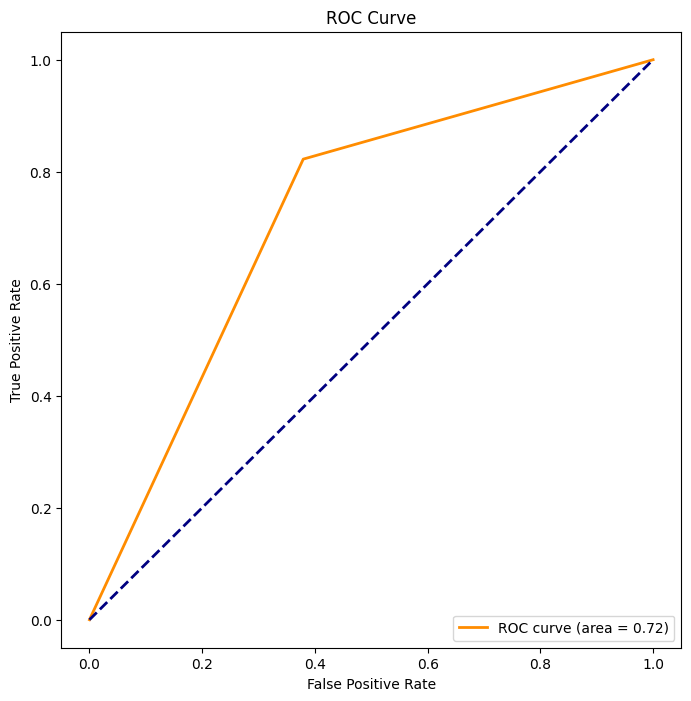

Area under the ROC curve is :  0.7215874311365028


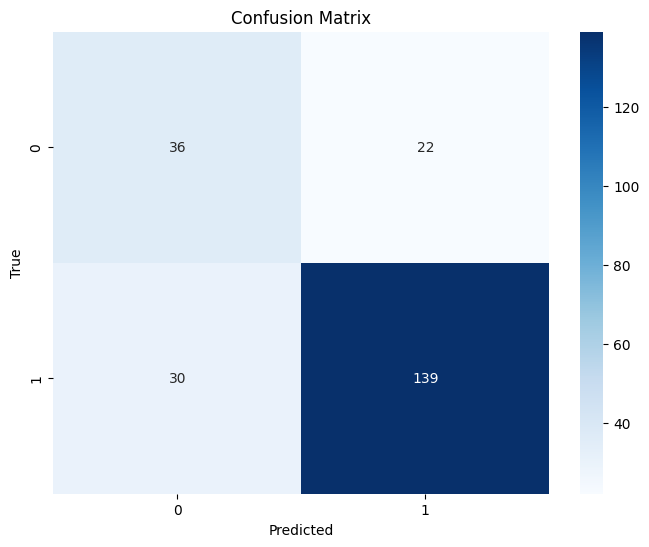


Support Vector Machine:
Train accuracy on Train data is:  0.7582278481012659
              precision    recall  f1-score   support

           0       0.82      0.24      0.37        58
           1       0.79      0.98      0.88       169

    accuracy                           0.79       227
   macro avg       0.81      0.61      0.62       227
weighted avg       0.80      0.79      0.75       227

0.72 accuracy with a standard deviation of 0.04 with Cross Validation


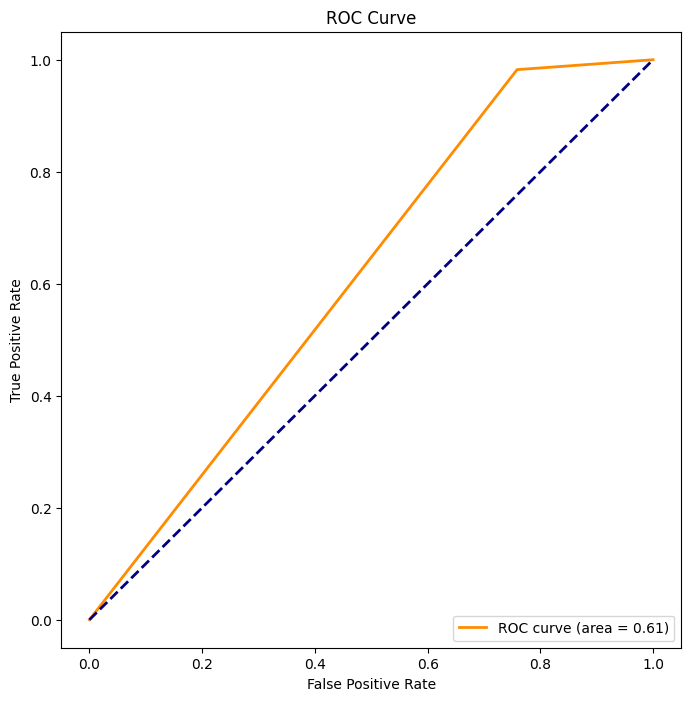

Area under the ROC curve is :  0.6118139155274434


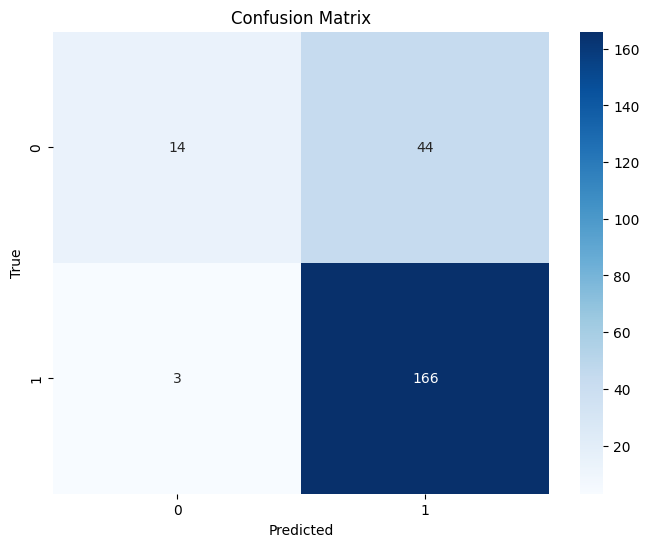


k-Nearest Neighbors:
Train accuracy on Train data is:  0.9379746835443038
              precision    recall  f1-score   support

           0       0.63      0.98      0.77        58
           1       0.99      0.80      0.89       169

    accuracy                           0.85       227
   macro avg       0.81      0.89      0.83       227
weighted avg       0.90      0.85      0.85       227

0.84 accuracy with a standard deviation of 0.04 with Cross Validation


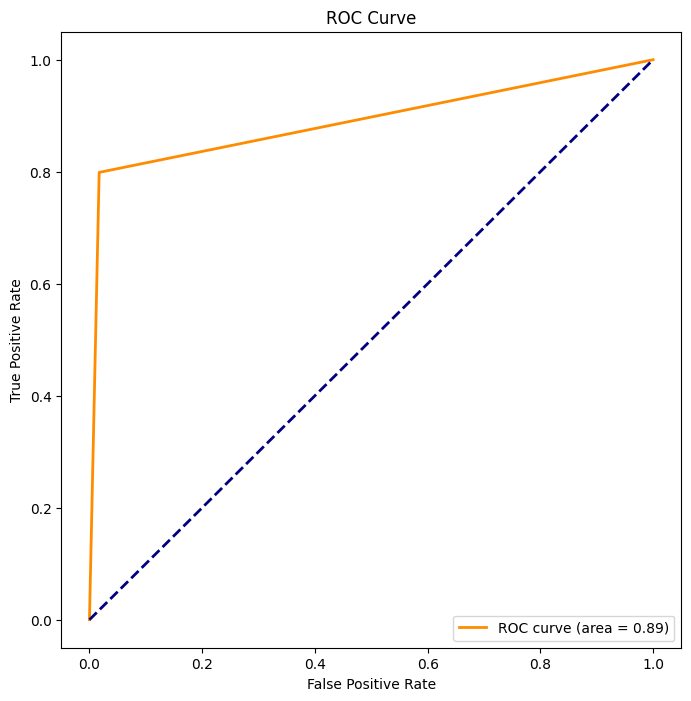

Area under the ROC curve is :  0.8907875943684962


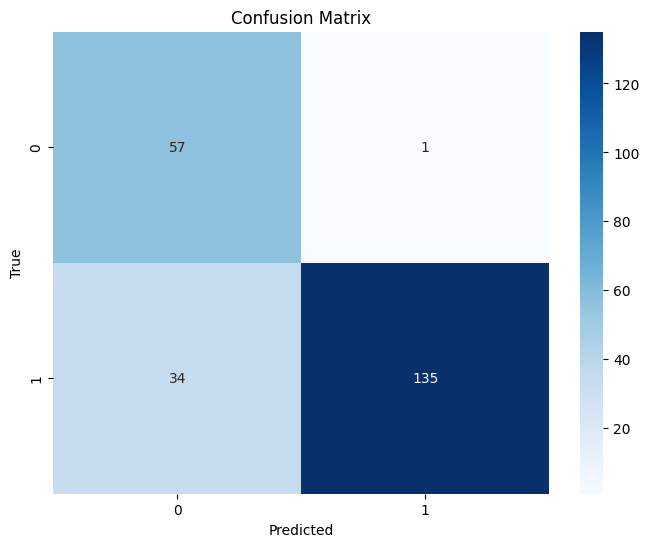


Random Forest:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        58
           1       0.81      0.94      0.87       169

    accuracy                           0.79       227
   macro avg       0.74      0.64      0.66       227
weighted avg       0.77      0.79      0.76       227

0.94 accuracy with a standard deviation of 0.04 with Cross Validation


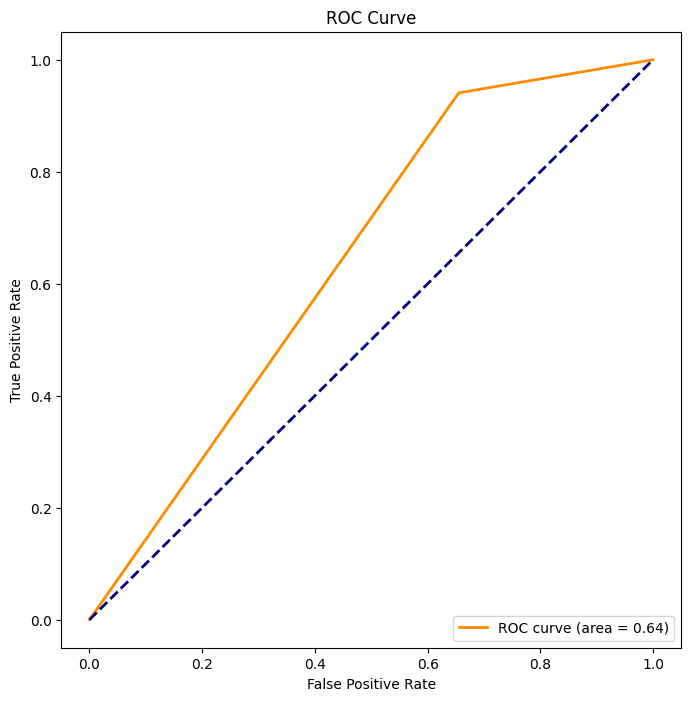

Area under the ROC curve is :  0.6428279942868803


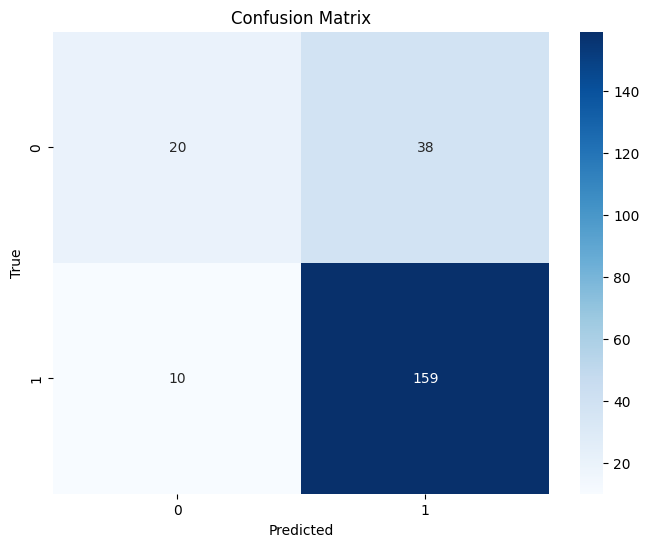


Decision Tree:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        58
           1       0.86      0.81      0.83       169

    accuracy                           0.76       227
   macro avg       0.69      0.71      0.70       227
weighted avg       0.77      0.76      0.76       227

0.82 accuracy with a standard deviation of 0.05 with Cross Validation


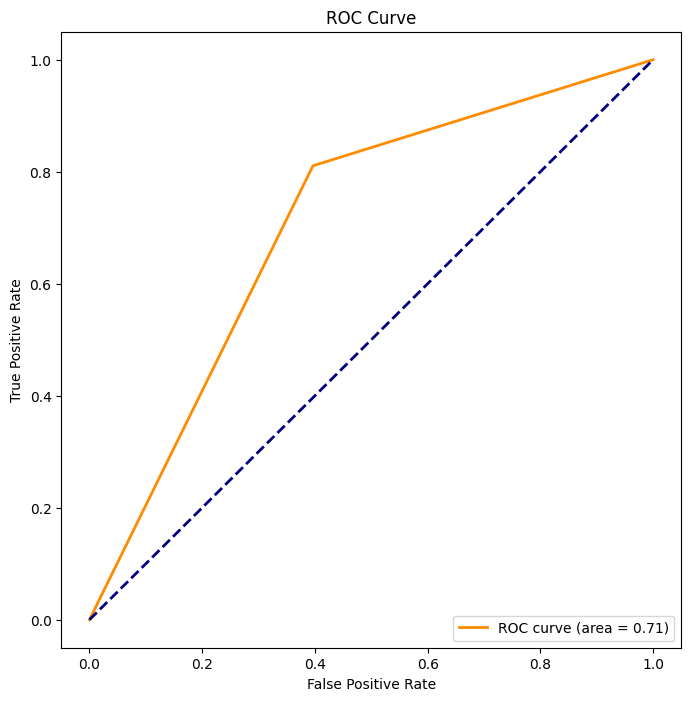

Area under the ROC curve is :  0.7070495817180167


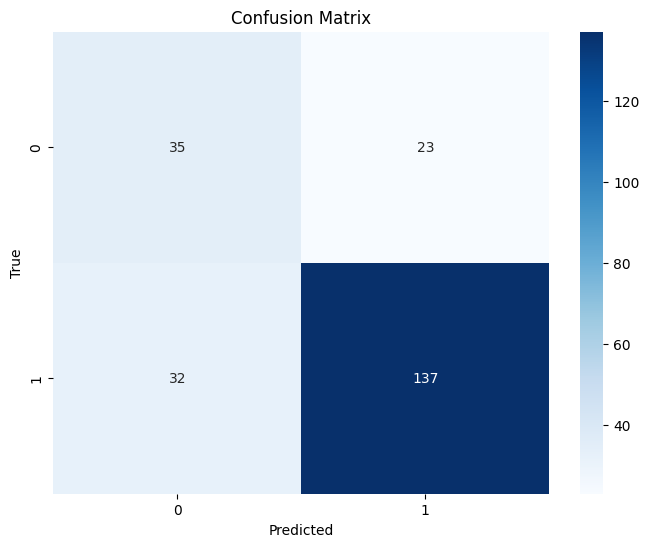


Comparison of Classifiers:
               Classifier  Accuracy  Sensitivity  Specificity       AUC
0     Logistic Regression  0.883544     0.822485     0.620690  0.721587
1  Support Vector Machine  0.718987     0.982249     0.241379  0.611814
2     k-Nearest Neighbors  0.841772     0.798817     0.982759  0.890788
3           Random Forest  0.935443     0.940828     0.344828  0.642828
4           Decision Tree  0.812658     0.810651     0.603448  0.707050

The best model based on accuracy is: Random Forest


In [ ]:
# Run methods
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, recall_score
def run():
    print('\nLoad Data: ')
    X, y = load_data()

    # Normalize Data using StandardScaler
    print('\nNormalize Data: ')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print('\nDimensional Reduction: ')
    X_low_dim = dimention_reduction(X, y, 'PCA', n_components=131, whitening=False, plot=False)  # PCA, LDA, ICA, autoencoder, sbf
    display(pd.DataFrame(X_low_dim))

    print('\nTrain Test Split')
    X_train, X_test, y_train, y_test = split_train_test(X_low_dim, y)

    print('\nHandle Imbalance Data: ')
    X_train, y_train = handle_imbalanced(X_train, y_train, 'smote', sampling_strategy='minority')  # smote, oversample, undersample
    print('After Handling Imbalanced Data: ', Counter(y_train))

    # Change discriminative methods
    models = {
        'Logistic Regression': discriminative_method(X_train, X_test, y_train, y_test, 'logistic'),  # logistic regression
        'Support Vector Machine': discriminative_method(X_train, X_test, y_train, y_test, 'svm'),  # support vector machine
        'k-Nearest Neighbors': discriminative_method(X_train, X_test, y_train, y_test, 'knn'),  # k-nearest neighbors
        'Random Forest': discriminative_method(X_train, X_test, y_train, y_test, 'random_forest'),  # random forest
        'Decision Tree': discriminative_method(X_train, X_test, y_train, y_test, 'tree')  # decision tree
    }

    results = {'Classifier': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [], 'AUC': []}

    for model_name, (model, y_pred) in models.items():
        # Classification reports for each model
        print(f"\n{model_name}:")
        classification_reports(X_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5)

        # Collect metrics for comparison
        accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
        sensitivity = recall_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_value = auc(fpr, tpr)

        # Store results in the dictionary
        results['Classifier'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Sensitivity'].append(sensitivity)
        results['Specificity'].append(specificity)
        results['AUC'].append(auc_value)

    # Create a DataFrame for better presentation
    comparison_df = pd.DataFrame(results)
    print("\nComparison of Classifiers:")
    print(comparison_df)

    # Find the best model based on accuracy
    best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]['Classifier']
    print(f"\nThe best model based on accuracy is: {best_model}")

run()


Load Data: 


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB
None Counter({1: 564, 0: 192})

Normalize Data: 

Dimensional Reduction: 


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,-10.034309,1.473186,-6.836298,-0.809853,-3.405661,-0.033693,1.994512,0.925260,0.458790,-0.473160,...,-0.782176,-1.296770,-0.343065,-0.018773,-1.414483,0.080571,-0.088628,-0.037810,0.451102,-0.838882
1,-10.624667,1.585847,-6.820881,1.390104,-3.174823,1.742995,2.147863,2.229634,0.631808,1.247580,...,-1.020353,-1.131195,-0.332496,0.865396,0.701525,0.594828,0.606034,-0.644873,-0.143381,-0.936911
2,-13.503155,-1.251541,-6.809195,1.388726,-2.259068,2.590965,0.756006,1.071568,0.112940,-1.542235,...,-1.557414,-0.929603,0.265959,0.911609,0.192221,1.401915,0.214040,0.487997,-0.072309,-0.946244
3,-9.143503,8.834664,15.302887,-4.081097,-5.063204,-9.536942,-2.908443,-5.220640,-4.779849,5.203670,...,0.832983,3.236061,0.425011,-0.770383,-0.359660,0.248373,-0.149507,-0.163284,0.399275,1.300570
4,-6.752753,4.612583,15.649159,-5.895137,-5.710882,-11.018595,-1.299189,-5.402774,-7.902122,7.289489,...,0.705780,0.371420,-0.707006,0.565496,-0.320335,0.163298,-0.476269,-1.015722,1.717918,-0.620594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,22.310813,6.480637,1.451795,11.228385,-4.888884,7.405218,-2.175665,-7.085225,-1.044669,3.521677,...,-2.160914,-0.229687,-0.393466,0.494637,0.983886,-0.047416,-0.580654,0.124886,-1.493412,0.575092
752,13.430631,1.447522,9.344597,8.852022,-3.996310,4.432413,-7.546872,-5.386917,-0.977399,2.459611,...,0.143956,1.592194,2.016789,-0.522091,-0.473896,-1.738262,-2.954688,0.287840,0.977538,1.783686
753,8.257256,2.389440,-0.919612,-2.131650,-1.013460,0.880764,1.811449,-1.318188,0.568191,-0.221012,...,-0.586700,0.133389,-0.970281,0.237874,-0.049941,-0.227671,-0.231050,-1.348614,-0.612568,-0.050963
754,3.998611,5.410284,-0.858433,-3.925767,0.287587,0.748918,0.259999,-0.791964,-0.863956,-0.694297,...,0.022923,0.406043,-0.124566,-1.188012,1.505978,1.009911,0.783104,0.816919,0.237183,0.523233



Train Test Split
Test Data: Counter({1: 169, 0: 58}) Train Data: Counter({1: 395, 0: 134})

Handle Imbalance Data: 
After Handling Imbalanced Data:  Counter({1: 395, 0: 395})

Logistic Regression:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        58
           1       0.87      0.82      0.84       169

    accuracy                           0.78       227
   macro avg       0.71      0.73      0.72       227
weighted avg       0.79      0.78      0.78       227

0.89 accuracy with a standard deviation of 0.03 with Cross Validation


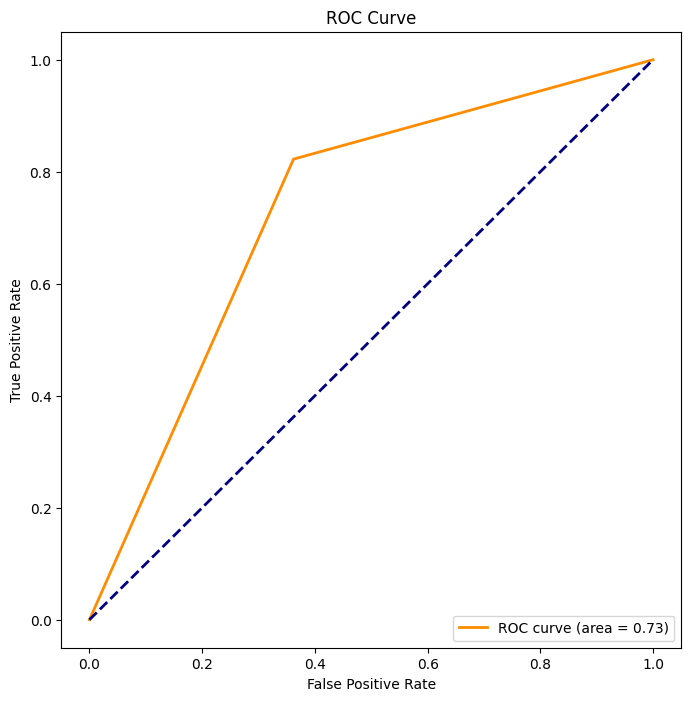

Area under the ROC curve is :  0.7302081207916752


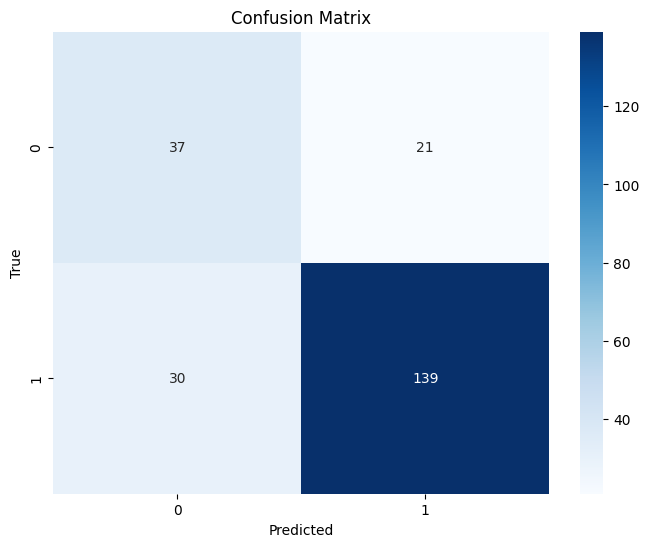


Support Vector Machine:
Train accuracy on Train data is:  0.7746835443037975
              precision    recall  f1-score   support

           0       0.84      0.28      0.42        58
           1       0.80      0.98      0.88       169

    accuracy                           0.80       227
   macro avg       0.82      0.63      0.65       227
weighted avg       0.81      0.80      0.76       227

0.75 accuracy with a standard deviation of 0.03 with Cross Validation


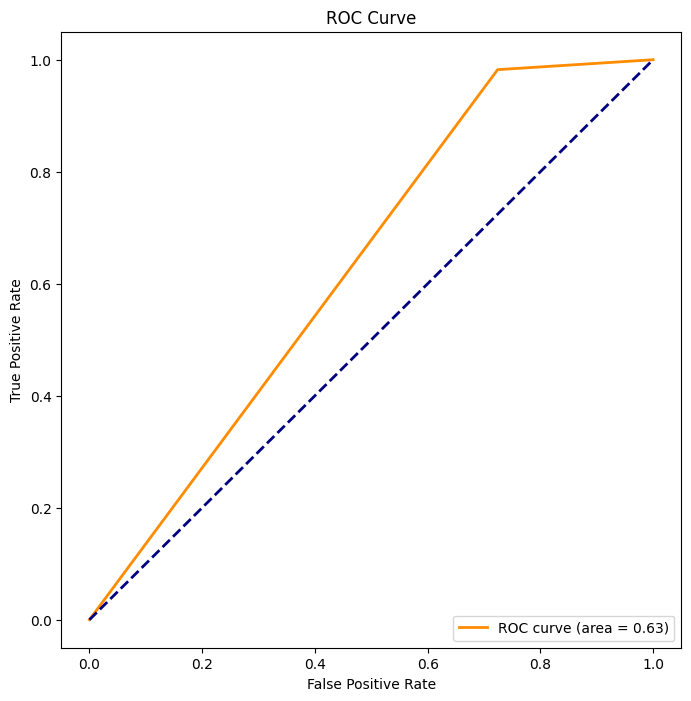

Area under the ROC curve is :  0.6290552948377883


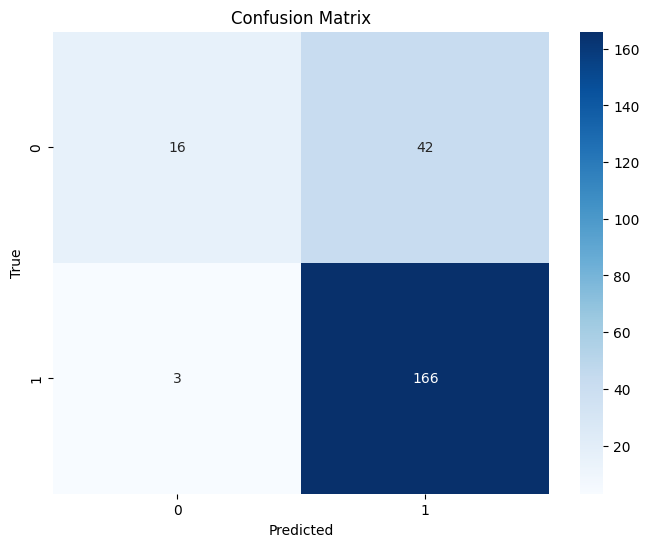


k-Nearest Neighbors:
Train accuracy on Train data is:  0.9379746835443038
              precision    recall  f1-score   support

           0       0.59      0.98      0.74        58
           1       0.99      0.76      0.86       169

    accuracy                           0.82       227
   macro avg       0.79      0.87      0.80       227
weighted avg       0.89      0.82      0.83       227

0.85 accuracy with a standard deviation of 0.03 with Cross Validation


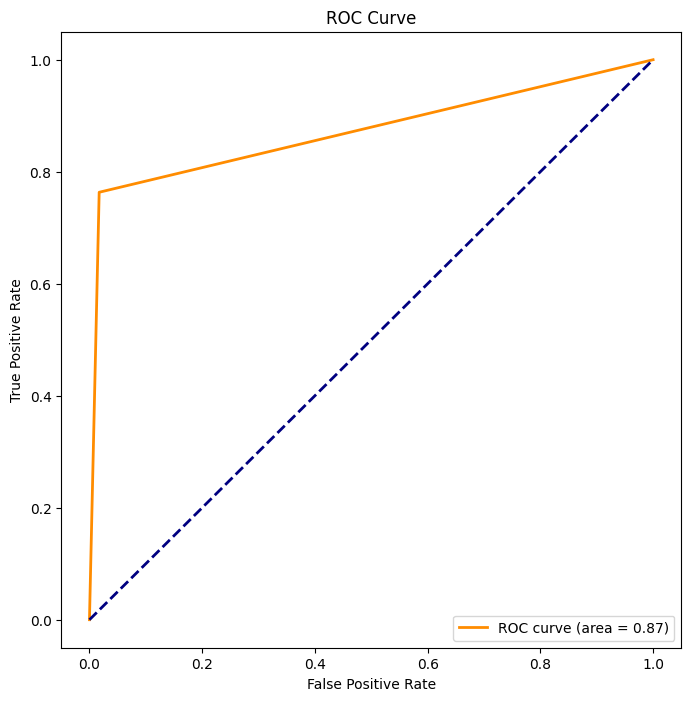

Area under the ROC curve is :  0.8730361150785554


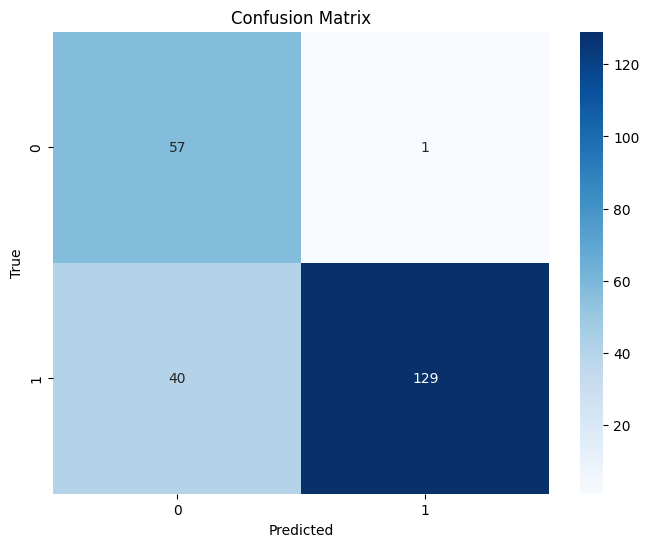


Random Forest:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.85      0.40      0.54        58
           1       0.82      0.98      0.89       169

    accuracy                           0.83       227
   macro avg       0.84      0.69      0.72       227
weighted avg       0.83      0.83      0.80       227

0.95 accuracy with a standard deviation of 0.03 with Cross Validation


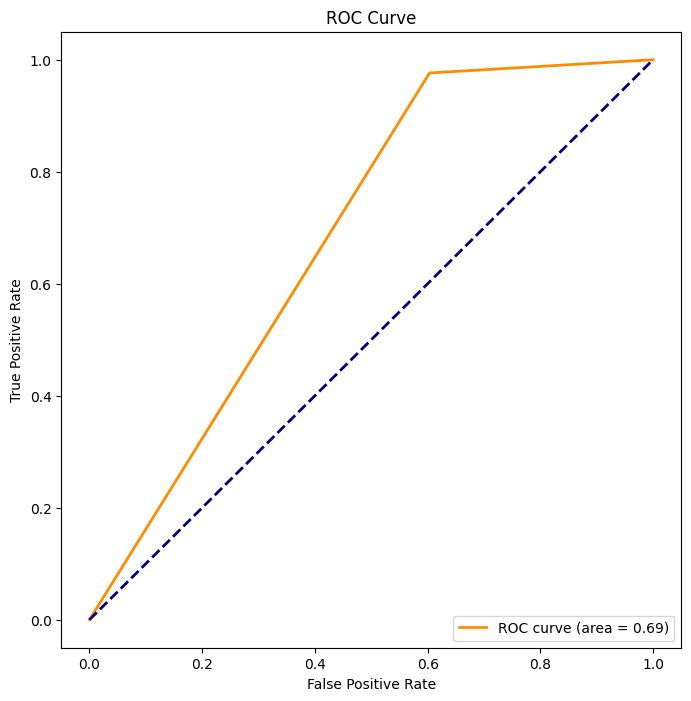

Area under the ROC curve is :  0.6864415425423382


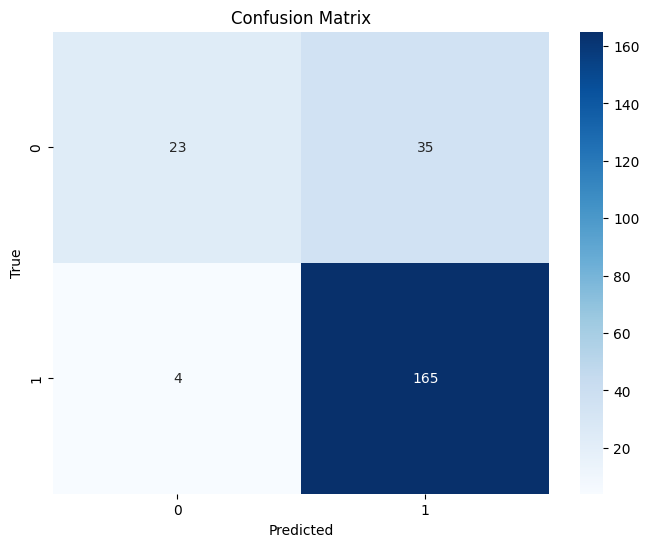


Decision Tree:
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.49      0.50      0.50        58
           1       0.83      0.82      0.82       169

    accuracy                           0.74       227
   macro avg       0.66      0.66      0.66       227
weighted avg       0.74      0.74      0.74       227

0.80 accuracy with a standard deviation of 0.04 with Cross Validation


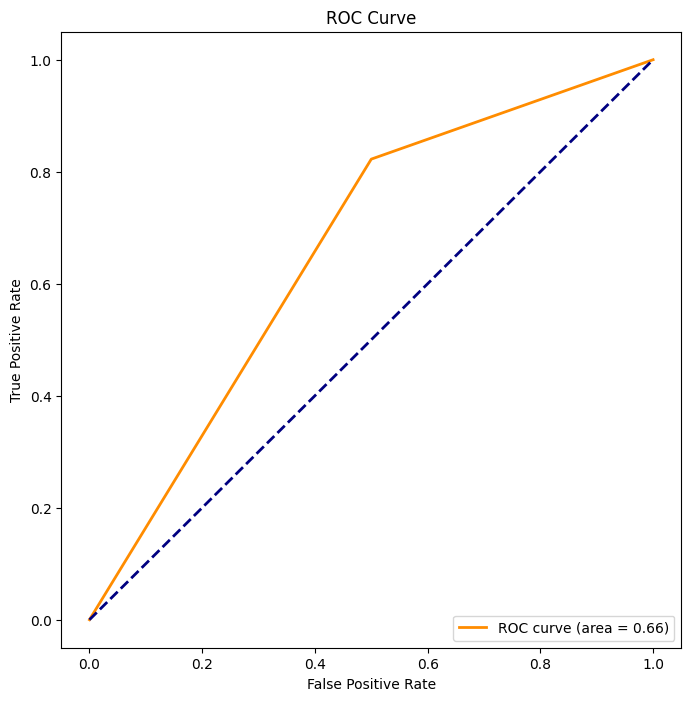

Area under the ROC curve is :  0.6612426035502958


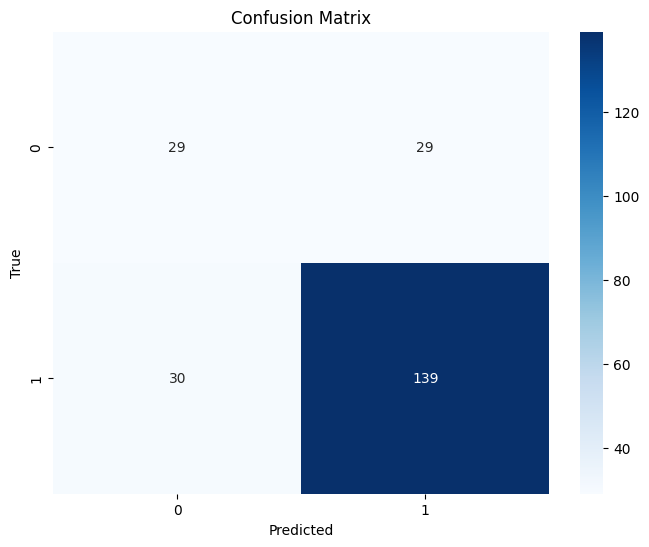


Comparison of Classifiers:
               Classifier  Accuracy  Sensitivity  Specificity       AUC
0     Logistic Regression  0.888608     0.822485     0.637931  0.730208
1  Support Vector Machine  0.745570     0.982249     0.275862  0.629055
2     k-Nearest Neighbors  0.851899     0.763314     0.982759  0.873036
3           Random Forest  0.948101     0.976331     0.396552  0.686442
4           Decision Tree  0.793671     0.822485     0.500000  0.661243

The best model based on accuracy is: Random Forest


In [ ]:
# Run methods
import pandas as pd
from sklearn.metrics import recall_score


def run():
    print('\nLoad Data: ')
    X, y = load_data()

    # Normalize Data using StandardScaler
    print('\nNormalize Data: ')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print('\nDimensional Reduction: ')
    X_low_dim = dimention_reduction(X, y, 'PCA', n_components=131, whitening=False, plot=False)  # PCA, LDA, ICA, autoencoder, sbf
    display(pd.DataFrame(X_low_dim))

    print('\nTrain Test Split')
    X_train, X_test, y_train, y_test = split_train_test(X_low_dim, y)

    print('\nHandle Imbalance Data: ')
    X_train, y_train = handle_imbalanced(X_train, y_train, 'smote', sampling_strategy='minority')  # smote, oversample, undersample
    print('After Handling Imbalanced Data: ', Counter(y_train))

    # Change discriminative methods
    models = {
        'Logistic Regression': discriminative_method(X_train, X_test, y_train, y_test, 'logistic'),  # logistic regression
        'Support Vector Machine': discriminative_method(X_train, X_test, y_train, y_test, 'svm'),  # support vector machine
        'k-Nearest Neighbors': discriminative_method(X_train, X_test, y_train, y_test, 'knn'),  # k-nearest neighbors
        'Random Forest': discriminative_method(X_train, X_test, y_train, y_test, 'random_forest'),  # random forest
        'Decision Tree': discriminative_method(X_train, X_test, y_train, y_test, 'tree')  # decision tree
    }

    results = {'Classifier': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [], 'AUC': []}

    for model_name, (model, y_pred) in models.items():
        # Classification reports for each model
        print(f"\n{model_name}:")
        classification_reports(X_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5)

        # Collect metrics for comparison
        accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
        sensitivity = recall_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_value = auc(fpr, tpr)

        # Store results in the dictionary
        results['Classifier'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Sensitivity'].append(sensitivity)
        results['Specificity'].append(specificity)
        results['AUC'].append(auc_value)

    # Create a DataFrame for better presentation
    comparison_df = pd.DataFrame(results)
    print("\nComparison of Classifiers:")
    print(comparison_df)

    # Find the best model based on accuracy
    best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]['Classifier']
    print(f"\nThe best model based on accuracy is: {best_model}")

run()



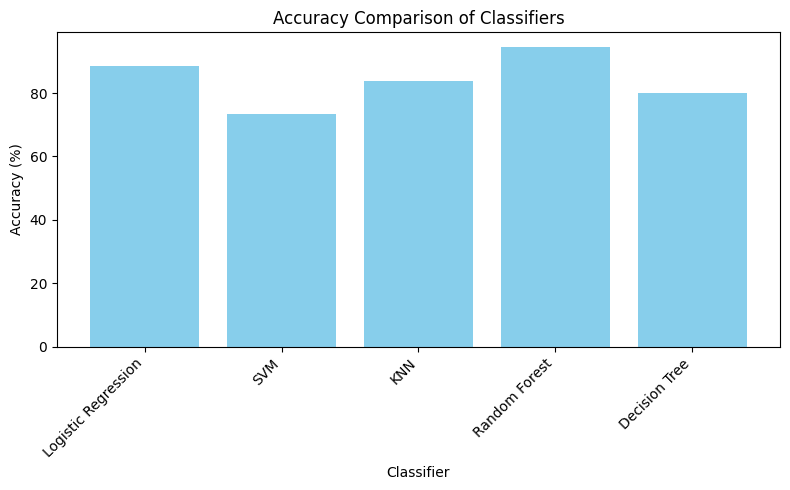

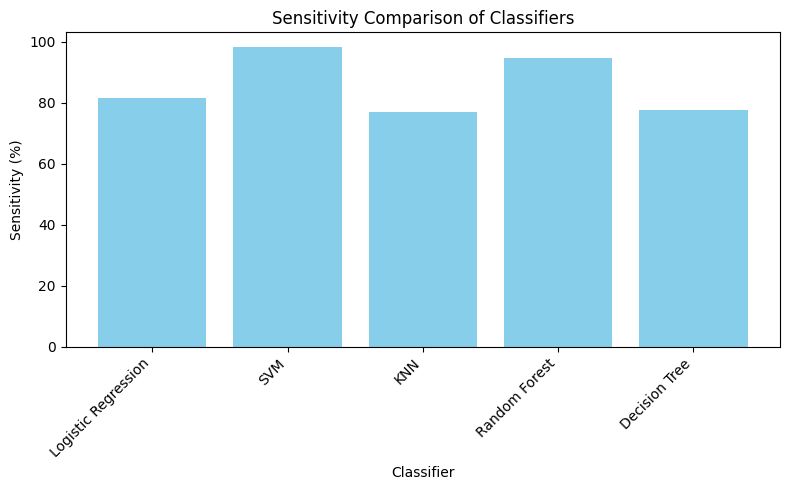

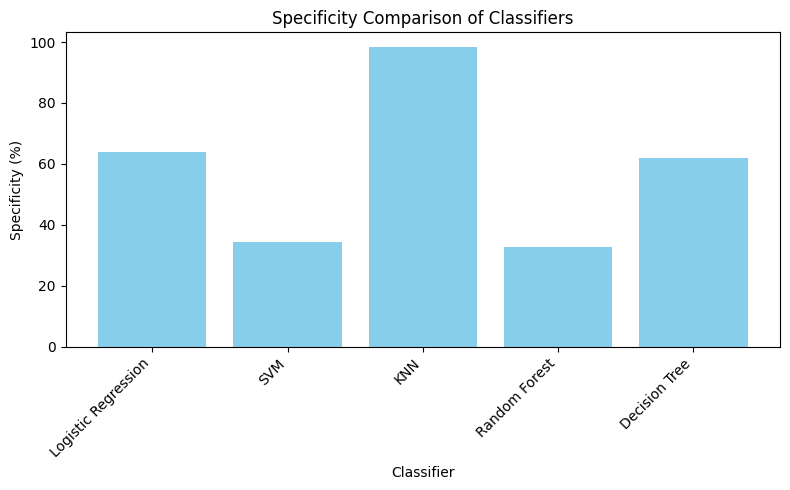

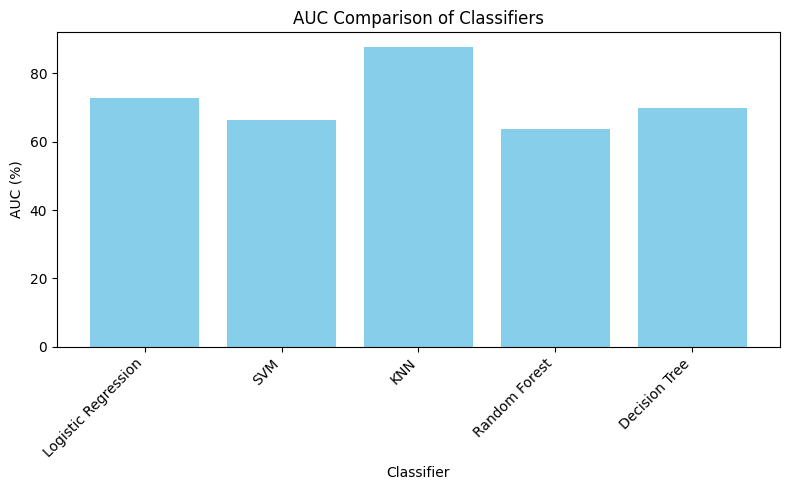

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
comparison_df = pd.DataFrame({
    'Classifier': ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [88.6076, 73.4177, 83.9241, 94.4304, 79.8734],
    'Sensitivity': [81.6568, 98.2249, 76.9231, 94.6746, 77.5148],
    'Specificity': [63.7931, 34.4828, 98.2759, 32.7586, 62.0690],
    'AUC': [72.7250, 66.3538, 87.5995, 63.7166, 69.7919]
})

# Plotting individual bar graphs for each metric
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(comparison_df['Classifier'], comparison_df[metric], color='skyblue')
    plt.xlabel('Classifier')
    plt.ylabel(f'{metric} (%)')
    plt.title(f'{metric} Comparison of Classifiers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
